<a href="https://colab.research.google.com/github/aman699/tesla-code/blob/day3/tesla_Hotelaman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>:

# Importing Essential Libraries

In [4]:
# importing imp library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




# Mounting drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##csv file location

In [6]:
#csv file location
file_path = '/content/drive/MyDrive/capstone project/Copy of Hotel Bookings.csv'


##Reading Data

In [7]:
# reading csv file
hotel_df = pd.read_csv(file_path)

##Exploring the data

In [8]:
#checking the shape
hotel_df.shape

(119390, 32)

In [9]:
# Checking first 5 rows
hotel_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
#looking for the data types non null entries
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:

hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# **Data Description:**
***hotel*** : Hotel(Resort Hotel or City Hotel)

**is_canceled **: Value indicating if the booking was canceled (1) or not (0)

lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year : Year of arrival date

arrival_date_month : Month of arrival date

arrival_date_week_number : Week number of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults : Number of adults

children : Number of children

babies : Number of babies

meal : Type of meal booked. Categories are presented in standard hospitality meal packages:

country : Country of origin.`

market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type : Code for the type of room assigned to the booking.

booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type : Indication on if the customer made a deposit to guarantee the booking.

agent : ID of the travel agency that made the booking

company : ID of the company/entity that made the booking or responsible for paying the booking.

days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type : Type of booking, assuming one of four categories

adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces : Number of car parking spaces required by the customer

total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status : Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Show – customer did not check-in and did inform the hotel of the reason why
reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [15]:
# creating a copy of our dataset
df=hotel_df.copy()

# Data Cleaning

In [16]:
null_columns=['agent','children','company']
for colm in null_columns:
  df[colm].fillna(0,inplace=True)
                  



In [17]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [18]:
df['country'].fillna('others',inplace=True)

In [19]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [20]:
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [35]:
df= df.drop_duplicates()

In [21]:
df.shape

(119390, 32)

#1) which has the average adr between hotel.

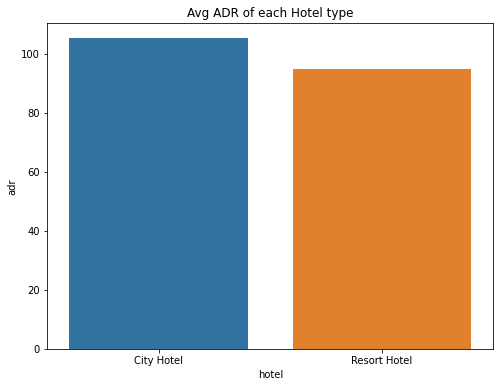

In [22]:
#grouping by hotel adr
group_by_hotel=df.groupby('hotel')
highest_adr=group_by_hotel['adr'].mean().reset_index()

#set plot size
plt.figure(figsize=(8,6))

# set labels
plt.xlabel('hotel') 
plt.ylabel('adr')
plt.title("Avg ADR of each Hotel type")
#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

# City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR More is the revenue.


Text(0.5, 1.0, 'Number of guests from diffrent Countries')

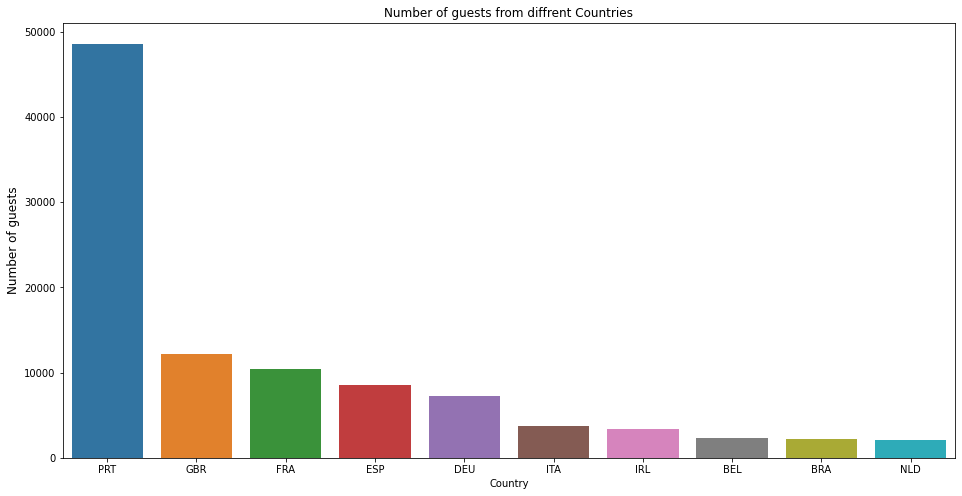

In [24]:
#2nd mst guest frm which country
country_df=df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'guests '})[:10]

plt.figure(figsize=(16,8))
sns.barplot(x=country_df['country'],y=country_df['guests '])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")

# 3) Which is the most preferred room type by the customers?


Text(0.5, 1.0, 'Most preferred Room type')

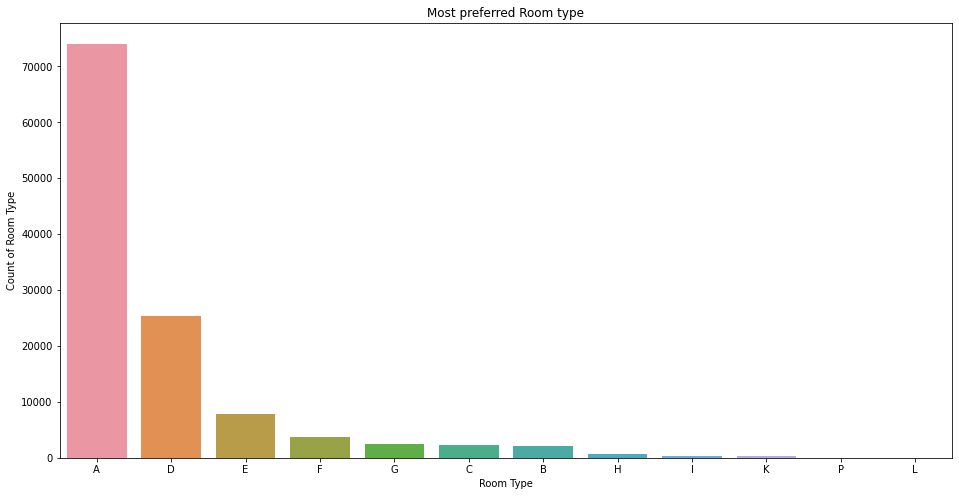

In [25]:
#set plotsize
plt.figure(figsize=(16,8))

#plotting 
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)
#set xlabel 
plt.xlabel('Room Type')
#set y label 
plt.ylabel('Count of Room Type')
#set title 
plt.title("Most preferred Room type")

# the most preferred Room type is "A".

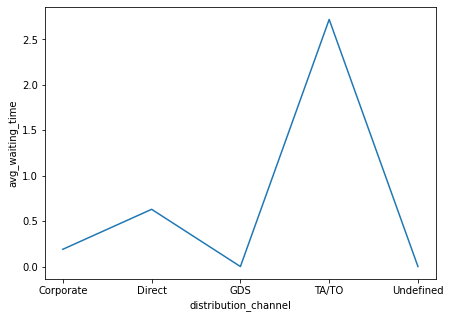

In [30]:
 #Which channel has longer average waiting time?
group_by_dc = df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.lineplot(x = d1['distribution_channel'], y = d1['avg_waiting_time'])
plt.show()

In [37]:
#Bking in june and july
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = [ 'June', 'July']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')[:2]

bookings_by_months_df

,arrival_date_month,Counts
6,June,10939
5,July,12661


Text(0, 0.5, 'Number of bookings')

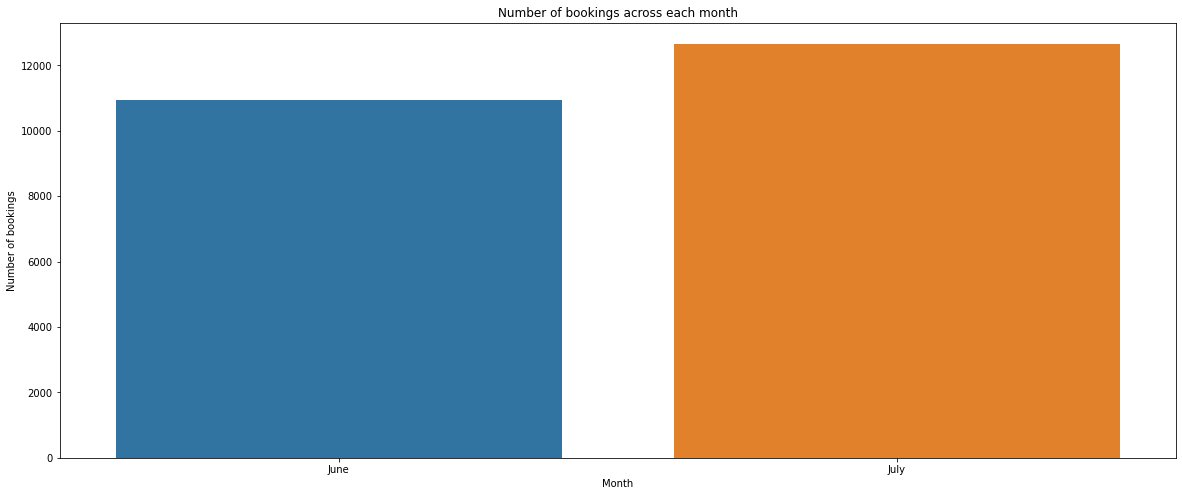

In [40]:

plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.barplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')